In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=7)

In [4]:
step_size = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

In [7]:
predictions = knn.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
predictions = predictions.reshape(x_mesh.shape)

In [20]:
cmap_light = ListedColormap(['#E6E5FA', '#CCFFCC', '#ADD8E6'])
cmap_bold  = ListedColormap(['#800080', '#008000', '#0000FF'])

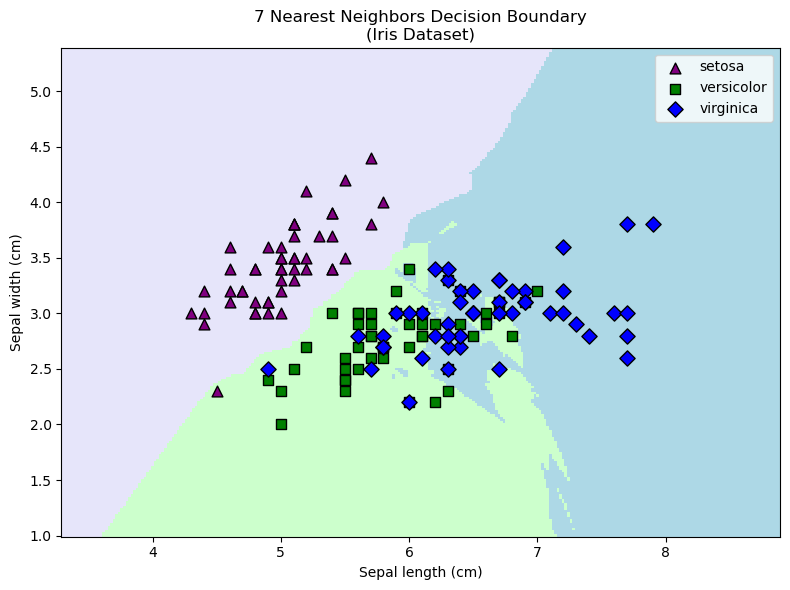

In [21]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(x_mesh, y_mesh, predictions, cmap=cmap_light, shading='auto')

for i, marker in enumerate(['^', 's', 'D']):
    plt.scatter(X[y == i, 0], X[y == i, 1],
                c=[cmap_bold(i)],
                marker=marker,
                edgecolor='k',
                s=60,
                label=iris.target_names[i])

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('7 Nearest Neighbors Decision Boundary\n(Iris Dataset)')
plt.legend()
plt.tight_layout()
plt.show()